

---


#**Machine Learning - II**

---

##**Aim: Performing GMM & Kmeans clustering on Clustering_gmm dataset to see which method provides us with better clusters**

---



In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
from sklearn.cluster import KMeans  # For KMeans clustering
from sklearn.mixture import GaussianMixture  # For Gaussian Mixture Model clustering
import matplotlib.pyplot as plt  # For data visualization

In [ ]:
# Loading the dataset
dataset = pd.read_csv('Clustering_gmm.csv')  # Reading the dataset from a CSV file
dataset.head(10)  # Displaying the first 10 rows of the dataset to understand its structure

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
5,61.577160,168.091751
6,63.341866,170.642516
7,61.041643,170.096682
8,62.633623,171.862972
9,53.407860,162.756843


Text(0, 0.5, 'Height')

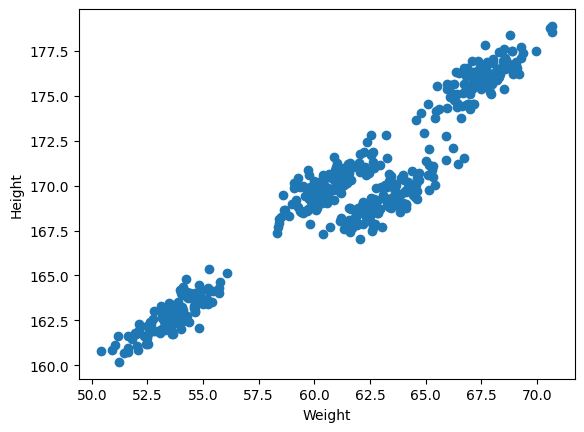

In [ ]:
# Plotting the data points to visualize distribution of Weight vs. Height
plt.figure()  # Creating a new figure
plt.scatter(dataset['Weight'], dataset['Height'])  # Scatter plot for Weight and Height
plt.xlabel('Weight')  # X-axis label
plt.ylabel('Height')  # Y-axis label
plt.title('Data Distribution: Weight vs. Height')  # Plot title
plt.show()  # Display the plot

In [ ]:
# Applying KMeans Clustering
kmeans = KMeans(n_clusters=4)  # Defining the KMeans model with 4 clusters
kmeans.fit(dataset)  # Fitting the model to the dataset to find cluster centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
# Predicting cluster labels using KMeans
predictions = kmeans.predict(dataset)  # Predicting the cluster for each data point
predictions  # Displaying the predicted cluster labels

array([2, 2, 3, 3, 2, 3, 1, 3, 1, 0, 1, 2, 1, 0, 3, 3, 2, 3, 0, 3, 3, 2,
       1, 0, 3, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 3, 2,
       1, 2, 1, 3, 2, 2, 0, 0, 1, 1, 3, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 1,
       3, 2, 3, 1, 0, 3, 0, 2, 0, 2, 1, 1, 3, 3, 0, 3, 0, 1, 3, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 3, 3, 2, 2, 2, 3, 0, 0, 2, 0, 3, 3, 3, 2, 3, 0,
       0, 1, 0, 0, 2, 0, 2, 3, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 3, 0,
       1, 0, 0, 0, 3, 2, 3, 1, 2, 2, 2, 2, 1, 0, 1, 3, 1, 0, 0, 2, 3, 3,
       3, 1, 1, 2, 3, 3, 2, 3, 2, 2, 1, 1, 2, 3, 0, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 3, 1,
       3, 0, 0, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 2, 2, 2, 3, 2, 1, 0, 0, 0,
       1, 2, 1, 0, 1, 2, 0, 3, 0, 3, 1, 1, 3, 1, 3, 1, 3, 1, 0, 2, 2, 1,
       3, 2, 0, 0, 3, 2, 3, 1, 3, 1, 2, 0, 3, 0, 0, 1, 0, 1, 3, 3, 2, 0,
       2, 2, 3, 3, 0, 2, 3, 0, 2, 3, 2, 0, 1, 1, 3, 2, 2, 3, 2, 1, 2, 3,
       1, 2, 3, 3, 3, 2, 0, 0, 2, 0, 0, 0, 3, 2, 2,

In [ ]:
# Adding the predictions as a new column in the DataFrame
dataframe1 = pd.DataFrame(dataset)  # Creating a new DataFrame from the dataset
dataframe1

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [ ]:
dataframe1['predictions'] = predictions  # Adding the 'predictions' column with cluster labels
dataframe1  # Displaying the updated DataFrame

,Weight,Height,predictions
0,67.062924,176.086355,2
1,68.804094,178.388668,2
2,60.930863,170.284496,3
3,59.733843,168.691992,3
4,65.431230,173.763679,2
...,...,...,...
495,59.976983,169.679741,3
496,66.423814,174.625574,2
497,53.604698,161.919208,0
498,50.433644,160.794875,0


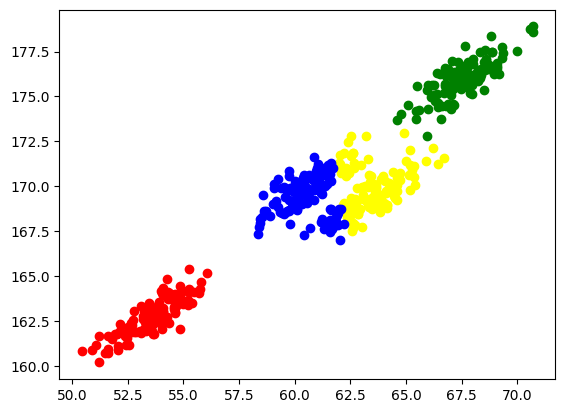

In [ ]:
# Visualizing KMeans Clusters
color = ['red', 'yellow', 'green', 'blue']  # Defining colors for clusters
plt.figure()  # Creating a new figure for plotting

for i in range(0, 4):  # Iterating over each cluster
    data = dataframe1[dataframe1['predictions'] == i]  # Filtering data points belonging to the current cluster
    plt.scatter(data['Weight'], data['Height'], c=color[i])  # Scatter plot for the cluster
plt.xlabel('Weight')  # X-axis label
plt.ylabel('Height')  # Y-axis label
plt.title('KMeans Clustering')  # Plot title
plt.legend()  # Adding a legend to indicate clusters
plt.show()  # Display the plot

### **Interpretation of KMeans Clustering:**

- KMeans forms spherical clusters, which may not be ideal for datasets that have varying cluster shapes.
- In this case, the clusters formed are not well-separated and do not adequately capture the data distribution.
- Therefore, we try to resolve this issue by performing GMM.

##**Applying Gaussian Mixture Model (GMM) Clustering to the same dataset**

In [ ]:
# Loading the dataset again for GMM clustering
dataset1 = pd.read_csv('Clustering_gmm.csv')  # Reading the dataset again for clarity

In [ ]:
dataset1.head(10)

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
5,61.577160,168.091751
6,63.341866,170.642516
7,61.041643,170.096682
8,62.633623,171.862972
9,53.407860,162.756843


In [ ]:
# Fitting the GMM model to the dataset
GMM = GaussianMixture(n_components=4)  # Defining the GMM model with 4 components (clusters)
GMM.fit(dataset1)  # Fitting the model to the dataset to learn the parameters (means, covariances, etc.)

GaussianMixture(n_components=4)

In [ ]:
# Predicting cluster labels using GMM
predictions1 = GMM.predict(dataset1)  # Predicting the cluster for each data point
predictions1  # Displaying the predicted cluster labels

array([2, 2, 3, 3, 2, 0, 0, 3, 3, 1, 0, 2, 0, 1, 3, 3, 2, 3, 1, 3, 3, 2,
       0, 1, 3, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 3, 1, 2, 1, 3, 3, 2,
       0, 2, 3, 3, 2, 2, 1, 1, 0, 3, 3, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       3, 2, 3, 0, 1, 3, 1, 2, 1, 2, 0, 0, 3, 3, 1, 3, 1, 3, 3, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 3, 1, 1, 2, 1, 3, 3, 0, 2, 3, 1,
       1, 0, 1, 1, 2, 1, 2, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 3, 1,
       0, 1, 1, 1, 3, 2, 3, 0, 2, 2, 2, 2, 0, 1, 3, 3, 0, 1, 1, 2, 3, 3,
       3, 0, 0, 2, 0, 3, 2, 3, 2, 2, 0, 0, 2, 3, 1, 0, 2, 1, 2, 0, 3, 1,
       3, 1, 1, 1, 2, 2, 2, 3, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 3, 0,
       3, 1, 1, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 2, 2, 2, 3, 2, 0, 1, 1, 1,
       3, 2, 0, 1, 0, 2, 1, 3, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 3, 2, 3, 3, 3, 0, 2, 1, 3, 1, 1, 0, 1, 0, 3, 3, 2, 1,
       2, 2, 3, 3, 1, 2, 3, 1, 2, 0, 2, 1, 0, 0, 3, 2, 2, 3, 2, 0, 2, 0,
       0, 2, 3, 3, 3, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2,

In [ ]:
# Adding the GMM predictions as a new column in the DataFrame
dataframe2 = pd.DataFrame(dataset1)  # Creating a new DataFrame from the dataset
dataframe2

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [ ]:
dataframe2['predictions'] = predictions1  # Adding the 'predictions' column with cluster labels
dataframe2  # Displaying the updated DataFrame

,Weight,Height,predictions
0,67.062924,176.086355,0
1,68.804094,178.388668,0
2,60.930863,170.284496,1
3,59.733843,168.691992,1
4,65.431230,173.763679,0
...,...,...,...
495,59.976983,169.679741,1
496,66.423814,174.625574,0
497,53.604698,161.919208,2
498,50.433644,160.794875,2


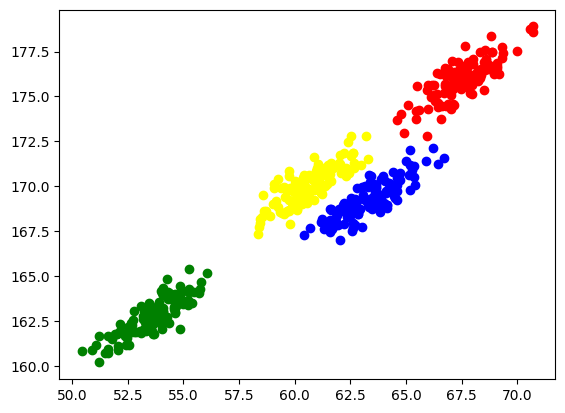

In [ ]:
# Visualizing GMM Clusters
plt.figure()  # Creating a new figure for plotting

for i in range(0, 4):  # Iterating over each cluster
    data1 = dataframe2[dataframe2['predictions'] == i]  # Filtering data points belonging to the current cluster
    plt.scatter(data1['Weight'], data1['Height'], c=color[i])  # Scatter plot for the cluster
plt.xlabel('Weight')  # X-axis label
plt.ylabel('Height')  # Y-axis label
plt.title('Gaussian Mixture Model Clustering')  # Plot title
plt.legend()  # Adding a legend to indicate clusters
plt.show()  # Display the plot

---
### **Results and Interpretation:**
---
- **KMeans Clustering:**
  - KMeans attempts to partition the dataset into spherical clusters by minimizing the within-cluster variance.
  - The clusters formed by KMeans are circular and may not accurately capture the distribution if clusters have varying shapes and sizes.
  - In the visualization, we observe that the clusters are not well-defined and overlap, indicating that KMeans is not suitable for this dataset.

- **Gaussian Mixture Model (GMM) Clustering:**
  - GMM is a probabilistic model that assumes data points are generated from a mixture of several Gaussian distributions.
  - GMM can capture more complex cluster shapes (e.g., elliptical) and overlapping clusters.
  - The visualization shows that the clusters formed by GMM are more distinct and follow the actual distribution of the data points more accurately.
---
### **Conclusion:**
---
- **GMM** provides better clustering results than **KMeans** for this dataset. The clusters formed by GMM are well-defined and better represent the underlying structure of the data.
- This is because GMM can adapt to clusters of different shapes and densities, while KMeans is restricted to spherical clusters.
- Therefore, for datasets with complex cluster shapes, GMM is a more suitable choice.

---